## Pandas - Timeseries & Bitcoin 

Presentation of most used fonctions in Timeseries (resample, rolling, & ewm) by analysis BITCOIN & ETHEREUM.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Convert dataFrame.index to DateTimeIndex

In [38]:
bitcoin = pd.read_csv('BTC-USD.csv', 
                      index_col = 'Date', # index_col = 'Date' replace Bitcoin.index (0,1,2...) by Date
                      parse_dates=True) # parse_dates pour dire que la date doit etre interpreter comme date et non string

type(bitcoin.index) # pandas.core.indexes.datetimes.DatetimeIndex

#Test wothout 2 last params for see difference

type(bitcoin.index) # 'pandas.core.indexes.datetimes.DatetimeIndex' instead 'pandas.core.indexes.range.RangeIndex'

bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


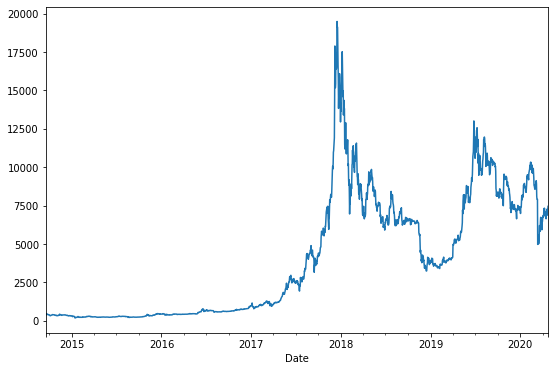

In [39]:
bitcoin.Close.plot(figsize=(9,6))
plt.show()

With this DateTimeIndex we can apply indexing & slicing on date e.g: bitcoi['2019']['Close']... cause panda can understand day, month & year</br>Notice:We can write date in any format cause behind pandas use method: pd.to_datetime('03 marche 1969') 

In [40]:
time = pd.to_datetime('   03 march/1969')
time

Timestamp('1969-03-03 00:00:00')

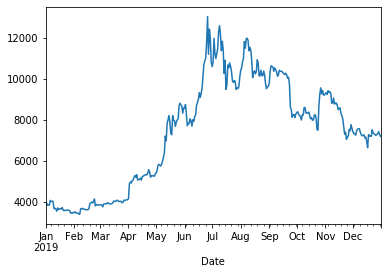

In [41]:
bitcoin['2019']['Close'].plot()

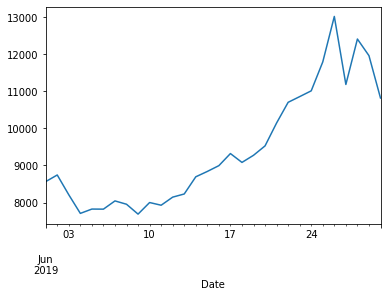

In [42]:
bitcoin['2019-06']['Close'].plot()

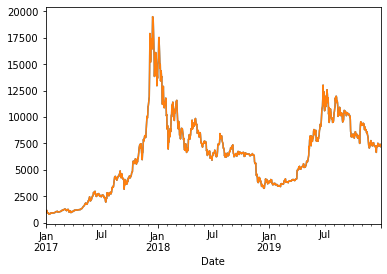

In [43]:
bitcoin['2017':'2019']['Close'].plot()
bitcoin.loc['2017':'2019','Close'].plot()

### Resample()

Permet de regrouper les donnees selon une frequence temporelle (Mois ou annee ou ... ) puis appliquer des stats dessus

Date
2019-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

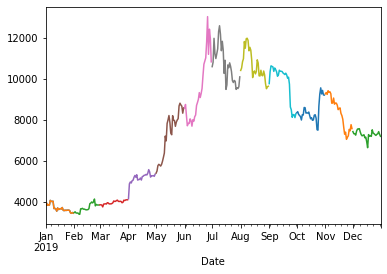

In [44]:
bitcoin.loc['2019','Close'].resample('M').plot() # groupe by Month
#bitcoin.loc['2019','Close'].resample('2W').plot() # or by 2 weeks

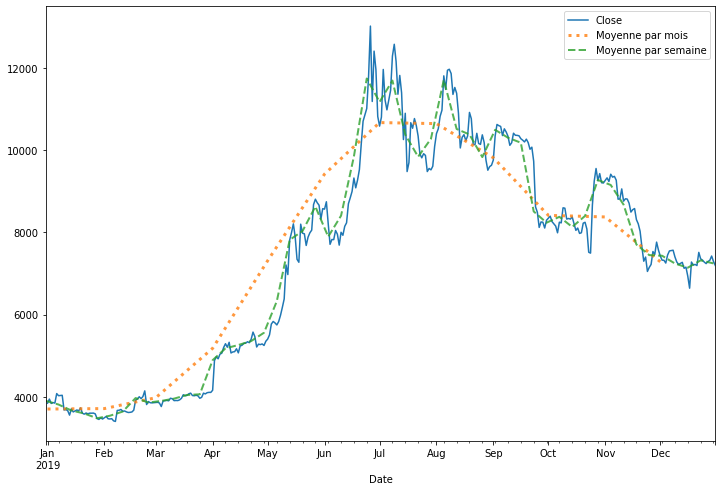

In [45]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019','Close'].plot()
bitcoin.loc['2019','Close'].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019','Close'].resample('W').mean().plot(label='Moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

### Aggregate: agg()

Utiliser par dessus resample() pour ajouter d'autres colonnes d'informations

In [46]:
bitcoin.loc['2019','Close'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Date,,,,
2019-01-31,3701.554963,178.739486,3448.116943,4076.632568
2019-02-28,3711.907261,202.869241,3399.471680,4142.526855
2019-03-31,3976.069100,89.649015,3761.557129,4106.660156
2019-04-30,5178.469417,247.788809,4158.183105,5572.361816
2019-05-31,7309.694131,1124.681118,5402.697266,8805.778320
2019-06-30,9415.900179,1575.241583,7688.077148,13016.231445
2019-07-31,10669.336158,903.400574,9477.641602,12573.812500
2019-08-31,10643.248362,718.630734,9510.200195,11966.407227
2019-09-30,9814.067871,875.567049,8104.185547,10623.540039


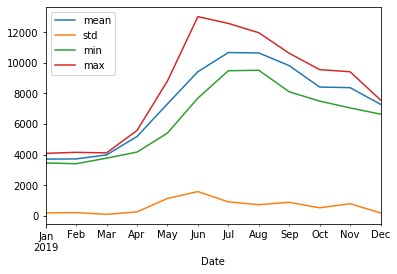

In [47]:
bitcoin.loc['2019','Close'].resample('M').agg(['mean', 'std', 'min', 'max']).plot()

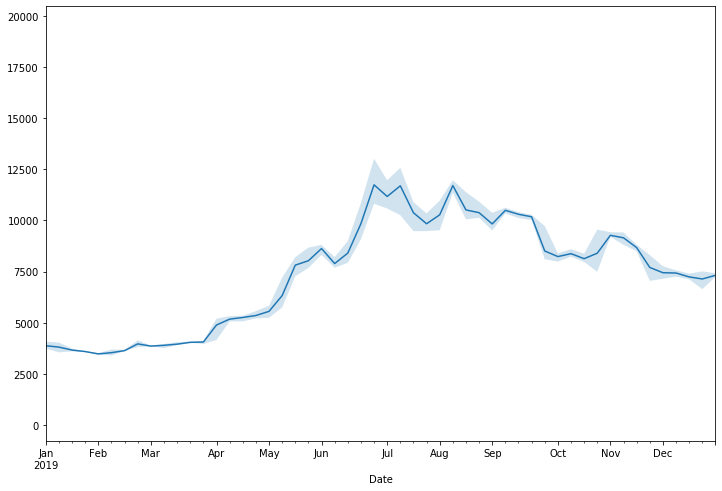

In [48]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='moyenne par semaine')

# fill_between : cree une zone d'incertitude entre le max et le min
plt.fill_between(m.index, m['max'], m['min'], alpha='0.2', label='min-max par semaine') 

#plt.legend()
plt.show()




## Moving Average & Exp Wighted function

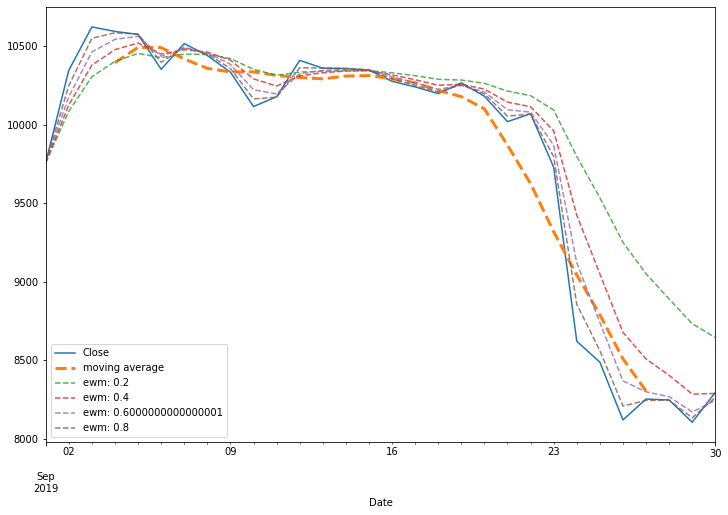

In [49]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09','Close'].rolling(window=7, center=True).mean().plot(label="moving average", lw=3, ls="--") ## i.e calculer la moyenne sur 7 ouvertures
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09','Close'].ewm(alpha=i).mean().plot(label=f"ewm: {i}", ls="--", alpha=0.8)

plt.legend()
plt.show()

## Assembler des datasets (Bitcoin with ethereum)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000200A7BDE6C8>,
      dtype=object)

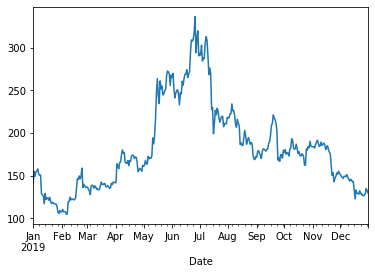

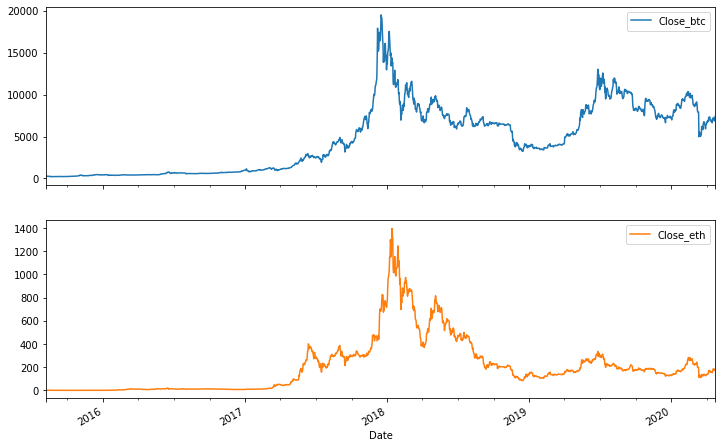

In [50]:
ethereum = pd.read_csv('ETH-USD.csv', index_col='Date', parse_dates= True)

ethereum['2019']['Close'].plot()

btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc','_eth'))

btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12,8))

In [51]:
# Matrice de correlation:

btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.751829
Close_eth,0.751829,1.000000


## Exercice: turtule strategy (when buy and when sale)